# Summary of Findings


### Introduction

In this project, we have looked into the dataset of LOL games in 2022. Each row of the dataset is an observation on each champion of all the games in 2022. 12 rows are generated for each game, including 2 rows that summarize the data as the opposing teams in a match and 10 players' info. In this project, we mainly focus on studying the performance of each team or performance of different champions in this game. We first cleaned the data to prepare for later investigation and hypothesis test. We then use utilize Exploratory Data Analysis to obtain an insight on interesting aspects provided by the dateset, from which we wonder whether champions that are commonly banned have a higher winning chance than champions that are less banned. Based on this question, we create our hypothesis test and use the permutation test to draw conclusion.

### Cleaning and EDA
we took many approches when cleaning and exploring our data. To begin with we choose several interesting columns out of the 123 columns in total. We discovered that the data is unique as one game id correspond to 10 player columns and 2 team columns. From there we discovered many missing by design expercially when it comes to the team rows. We dive in to investigating date and calculated scores using existing columns. Additionally, we looked at the multiple ban columns and did intersting investigation. We looked into the relationship between firstblood of the team, total kills of the team, as well as whether the team won the game.

### Assessment of Missingness

The column of urls in the dataset has major missingness. We intitally speculate its missingness as a type of NMAR since its missing must relate to whether an actual url was created for a certain game. 

However, we utilized permutation teat to study whether a relationship exists between the missingness of urls and whether the match was one of the playoffs. Since the dataset is too large to create a reasonable sample distribution from shuffling the column, we sampled only 4000 matches from the entire dataset. We failed to reject the null, suggesting that the missingness is not associated with the fact whether the game is one of the playoffs, and the missingness should be MCAR instead of MAR. 

Further, we perfomed the permuation test to test the association between url missingness and whether the gameid contains a specifc string "ESPORTSTMNT". From the low p-value, we reject the null hypothesis and draw the conclusion that the missingness of urls is related to the whether the gameid contains "ESPORTSTMNT".



### Hypothesis Test

Exploring the data set we realized that there are several champions that were banned more often then others. This has led us to wonder whether using a commonly banned champion in a game effect the result of the game and the question: 

**Are commonly banned champions more likely to win a match?**

To answer this question we set up a hypothesis test:
- null hypothesis: commonly banned champion and other champions have the same lilelyness to win
- alternativel hypothesis: commonly banned champions are more likely to win a game


**setup**
- Before we start, we have to identify the threshold to define commonly banned champs. To do so we looked at the banned rates of champions and decided to define commonly banned champs as one that has a ban rate >=20%. 
- Moving on, for the test statistic we choose to find the signed difference between the winning rates of these 2 groups. We chose to find the signed difference instead of unsign becasue our alternative hypothesis is that commonly banned champion have a higher chance of winning. With this test statistic it is expected that the bigger the test statistic the more we goes towards the alternative hypothesis. 
- For our obserbed test statistic we got a sign differnce bettwen winning rate of 0.0306
- For the significant level we choose is 0.01, since we are dealing with a really big data set.

**results**
- the p value we got from running permutation tests is 0.00. 
- In conclustion, we reject the null at significasnt level 0.01.
- Our data suggest that using commonly banned cham in a game is more likely to win the game.



# Import
import several packages and load data frame

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures
import warnings
warnings.filterwarnings('ignore')

In [2]:
lol_2022= pd.read_csv("LOL_2022.csv",low_memory=False)

## Cleaning and EDA

#### This is what ourdata looks like

In [3]:
lol_2022.head(3)

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,121.0,391.0,345.0,14.0,0.0,1.0,0.0,0.0,1.0,0.0
1,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,100.0,541.0,-275.0,-11.0,2.0,3.0,2.0,0.0,5.0,1.0
2,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,119.0,-475.0,153.0,1.0,0.0,3.0,0.0,3.0,3.0,2.0


#### Lets take a look at the data

In [4]:
# the shape of the data is 146688 rows and 123
lol_2022.shape

(146688, 123)

In [5]:
# The coloumns of the data looks like 
lol_2022.columns

Index(['gameid', 'datacompleteness', 'url', 'league', 'year', 'split',
       'playoffs', 'date', 'game', 'patch',
       ...
       'opp_csat15', 'golddiffat15', 'xpdiffat15', 'csdiffat15', 'killsat15',
       'assistsat15', 'deathsat15', 'opp_killsat15', 'opp_assistsat15',
       'opp_deathsat15'],
      dtype='object', length=123)

In [6]:
# we choose several columns we were interested in by lookimng at the df's columns)
clean=["gameid","playoffs","url","side","position","date","league","playername","teamname","champion","teamkills","result","ban1","ban2","ban3","ban4","ban5","firstblood","firstbloodkill"]
lol_2022_clean=lol_2022[clean]
lol_2022_clean['date']=pd.to_datetime(lol_2022_clean["date"])
lol_2022_clean.head(3)


,gameid,playoffs,url,side,position,date,league,playername,teamname,champion,teamkills,result,ban1,ban2,ban3,ban4,ban5,firstblood,firstbloodkill
0,ESPORTSTMNT01_2690210,0,NaN,Blue,top,2022-01-10 07:44:08,LCK CL,Soboro,Fredit BRION Challengers,Renekton,9,0,Karma,Caitlyn,Syndra,Thresh,Lulu,0.0,0.0
1,ESPORTSTMNT01_2690210,0,NaN,Blue,jng,2022-01-10 07:44:08,LCK CL,Raptor,Fredit BRION Challengers,Xin Zhao,9,0,Karma,Caitlyn,Syndra,Thresh,Lulu,1.0,0.0
2,ESPORTSTMNT01_2690210,0,NaN,Blue,mid,2022-01-10 07:44:08,LCK CL,Feisty,Fredit BRION Challengers,LeBlanc,9,0,Karma,Caitlyn,Syndra,Thresh,Lulu,0.0,0.0


#### Plotting interesting columns:

<AxesSubplot:title={'center':'cumalative games in 2022'}>

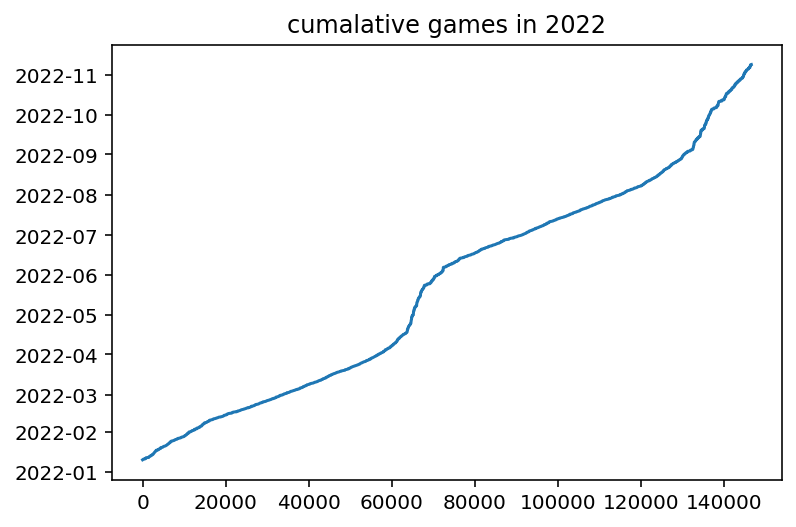

In [7]:
lol_2022_clean["date"].plot(title = "cumalative games in 2022")

Observation: we see from the cumalative games plot that there are some interesting trend in the number of games played in differnt months. we can see that there is a increase amount of games played around may and october. we speculated that this might be because of the sesonal competitions.

#### Investigating socre:

we obsertved that each game has one unique gameid, 10 players columns and 2 summary of the performace of each team. Therfore for each unique game we have 12 rows. Shown above that there are missing data in the champion columns of the dataset. We belive this is missing by design becasuse team doesnt have champions. Instead it is all disoplayed under player rows. 

In [8]:
inv_score=lol_2022[["champion","kills","deaths","assists"]]
inv_score[0:12]

,champion,kills,deaths,assists
0,Renekton,2,3,2
1,Xin Zhao,2,5,6
2,LeBlanc,2,2,3
3,Samira,2,4,2
4,Leona,1,5,6
5,Gragas,1,1,12
6,Viego,4,1,10
7,Viktor,6,3,12
8,Jinx,8,2,10
9,Alistar,0,2,18


Given the explination above we can drop missing data by applying .dropna()

In [9]:
inv_score=inv_score.dropna()
inv_score.head(3)

,champion,kills,deaths,assists
0,Renekton,2,3,2
1,Xin Zhao,2,5,6
2,LeBlanc,2,2,3


We want to manually create a "score" using datas in the kills death and assists columns:
we will count kills as 5 points, death as -3 and assist as 2 points

In [10]:
inv_score["score"]=(inv_score["kills"]*5)+(inv_score["deaths"]*-3)+(inv_score["assists"]*2)
inv_score.head(3)

,champion,kills,deaths,assists,score
0,Renekton,2,3,2,5
1,Xin Zhao,2,5,6,7
2,LeBlanc,2,2,3,10


(array([1.5400e+02, 1.7112e+04, 4.0551e+04, 3.7164e+04, 2.0230e+04,
        5.8710e+03, 1.0090e+03, 1.2500e+02, 1.7000e+01, 7.0000e+00]),
 array([-38. , -20.1,  -2.2,  15.7,  33.6,  51.5,  69.4,  87.3, 105.2,
        123.1, 141. ]),
 <BarContainer object of 10 artists>)

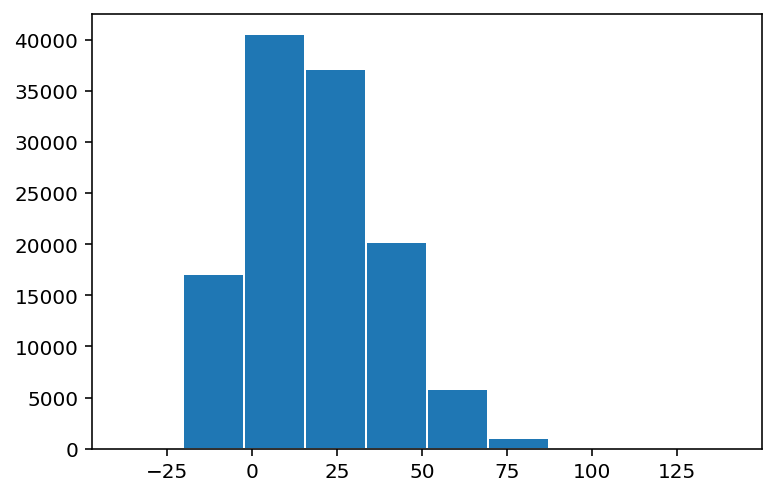

In [11]:
# plot our scores distribution
plt.hist(inv_score["score"],ec="w")


### Univariate Analysis: investigating ban data

In [12]:
# ban_df contians all banned hero form all games in this year
all_ban=lol_2022[lol_2022['position'] == 'team'][['ban1','ban2','ban3','ban4','ban5']]
ban_list=list(all_ban["ban1"])+list(all_ban["ban2"])+list(all_ban["ban3"])+list(all_ban["ban4"])+list(all_ban["ban5"])
ban_df=pd.DataFrame(ban_list).dropna()
ban_df=ban_df.rename(columns={0: "ban"})
ban_df.head(3)

,ban
0,Karma
1,Lee Sin
2,Sona


#### plot a interesting pivot table

In [13]:
ban_value_count=pd.DataFrame(ban_df.value_counts())
ban_value_count=ban_value_count.rename(columns={0:"banned_count"})
ban_value_count.head(3)

,banned_count
ban,
Zeri,4639
Gwen,4196
LeBlanc,2891


In [14]:
#ban_rate shows the calsulated ban rate of champions
num_games=len(ban_list)/10
ban_rate=pd.DataFrame(ban_df["ban"].value_counts()/num_games)
ban_rate.head(3)

,ban
Zeri,0.379499
Gwen,0.343259
LeBlanc,0.236502


<AxesSubplot:title={'center':"champion's ban_rate"}>

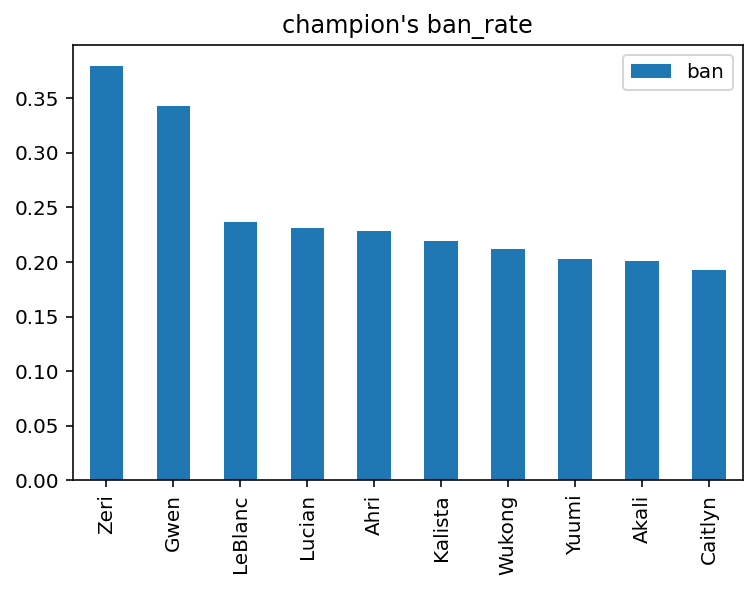

In [15]:
ban_rate[:10].plot(kind="bar",title="champion's ban_rate")

In [16]:
commonly_banned=list(ban_rate[ban_rate["ban"]>=0.2].index)
# >>> commonly_banned
# >>> ['Zeri','Gwen','LeBlanc','Lucian','Ahri','Kalista','Wukong','Yuumi','Akali']

### Bivariante Analysis 


In [17]:
# Studying the relation between the firstblood, total kills, and result 
first_blood = lol_2022_clean[['firstblood','teamkills','result', 'position']]
first_blood = first_blood[first_blood['position'] == 'team']
first_blood = first_blood.drop(columns = ['position'])
na_value_in_first_blood = first_blood['firstblood'].isna().value_counts().loc[True] # na_value_in_first_blood = 2
# since there are two null values for the entire dataset, we will drop these two obervations and make the column to be int 
first_blood = first_blood.dropna()
first_blood['firstblood'] = first_blood['firstblood'].astype(bool)
first_blood['result'] = first_blood['result'].astype(bool)
first_blood.head(3)


,firstblood,teamkills,result
10,True,9,False
11,False,19,True
22,False,3,False


firstblood
False    AxesSubplot(0.125,0.125;0.775x0.755)
True     AxesSubplot(0.125,0.125;0.775x0.755)
Name: teamkills, dtype: object

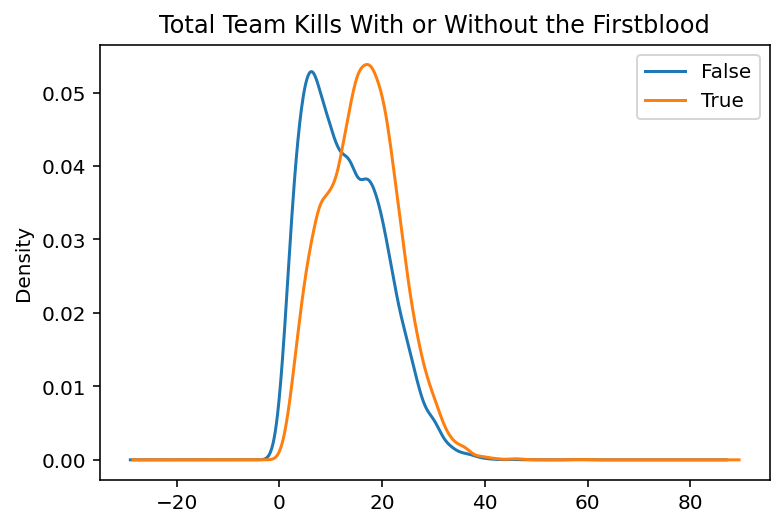

In [18]:
# plotting the distributions of total team kills after whether the team get the first blood
first_blood.groupby('firstblood')['teamkills'].plot(kind = 'kde', legend = True, title = "Total Team Kills With or Without the Firstblood")

result
False    AxesSubplot(0.125,0.125;0.775x0.755)
True     AxesSubplot(0.125,0.125;0.775x0.755)
Name: teamkills, dtype: object

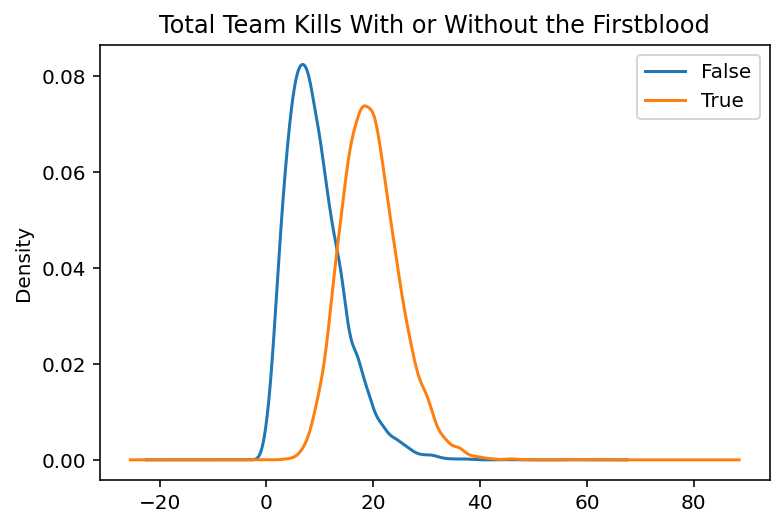

In [19]:
# plotting the distributions of total team kills of winning or losing teams 
first_blood.groupby('result')['teamkills'].plot(kind = 'kde', legend = True, title = "Total Team Kills With or Without the Firstblood")

<AxesSubplot:xlabel='firstblood', ylabel='result'>

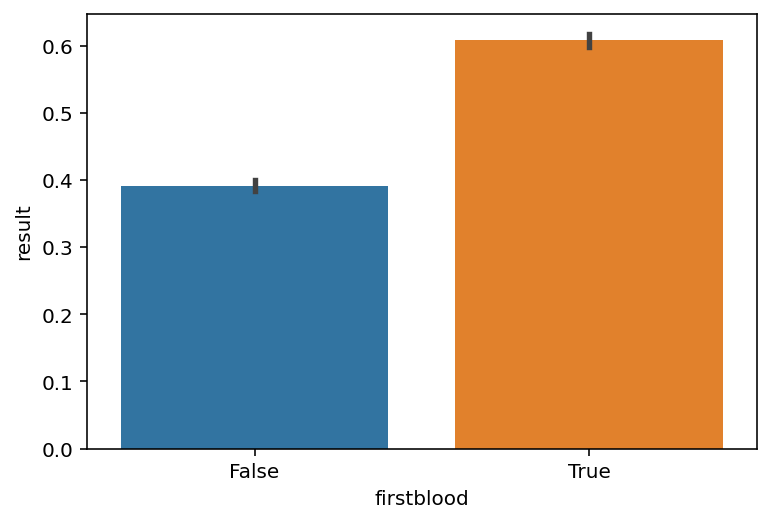

In [20]:
# based on the barplot, around 60 percent of winning team got the first blood  
sns.barplot(data=first_blood, x = 'firstblood', y = 'result')

#### Interesting Aggregates:

In [21]:
# these are the winning rate by team
team_winrate=lol_2022_clean.groupby("teamname")["result"].mean()
team_winrate[:5]

teamname
100 Thieves                0.565789
100 Thieves Academy        0.581197
100 Thieves Next           0.766234
1907 Fenerbahçe Academy    0.666667
300                        0.416667
Name: result, dtype: float64

In [22]:
# these are the winning rate by champion
champ_winrate=lol_2022_clean.groupby("champion")["result"].mean()
champ_winrate[:5]

champion
Aatrox     0.539563
Ahri       0.529817
Akali      0.517797
Akshan     0.500000
Alistar    0.496314
Name: result, dtype: float64

#### Interesting pivot table
we investigated the distribution of position's getting first blood by teams

In [23]:
piv=lol_2022_clean.pivot_table(index="teamname",columns=["position"], values="firstbloodkill", aggfunc="mean")
piv.head(3)

position,bot,jng,mid,sup,top
teamname,,,,,
100 Thieves,0.065789,0.105263,0.144737,0.026316,0.131579
100 Thieves Academy,0.094017,0.239316,0.042735,0.051282,0.068376
100 Thieves Next,0.064935,0.233766,0.129870,0.064935,0.103896


#### Investigating side's relation to result
- In each league game there is a red side and a blue side. We want to investigate using groupby to see whether side affects the result.

In [24]:
lol_2022_clean.groupby("side")["result"].mean()

side
Blue    0.524378
Red     0.475376
Name: result, dtype: float64

In [25]:
blue_prop=lol_2022_clean.groupby("side")["result"].mean().loc['Blue']
red_prop=lol_2022_clean.groupby("side")["result"].mean().loc['Red']
abs(blue_prop-red_prop)

0.04900196335078538

cool observation: according to our data, if a team is on blue side they have a 52.4378% of winning while only 47.5376% if on the red side. it is iteresting to see thay there is a around 4.9% adifference in the winnning poportions.

## Assessment of Missingness

We found a lot of missingness in the url columns. This infomation could be NMAR because it will be null if no url exist for certain games and there will be a url if a url exist for that match. In this case, whether the value is missing is dependent on whether there is an actual url created for this match, making this missingness to be NMAR.

However, we suspect that url existance might be related to columns from this dataset. We selected the columns playoffs and gameid. Playoff games would be used to determine which team will play for championship. It seems to be important, and important games might have designed webpages. Another possible explainatio for the missingness is the game ID, which could potentially show us whether the url is missing because of a specifc game setting given in game ID. We will perform permuation tests to check if the column url is truely MAR or MCAR to playoffs and gameid. 

In [26]:
lol_2022_clean.head(3)

,gameid,playoffs,url,side,position,date,league,playername,teamname,champion,teamkills,result,ban1,ban2,ban3,ban4,ban5,firstblood,firstbloodkill
0,ESPORTSTMNT01_2690210,0,NaN,Blue,top,2022-01-10 07:44:08,LCK CL,Soboro,Fredit BRION Challengers,Renekton,9,0,Karma,Caitlyn,Syndra,Thresh,Lulu,0.0,0.0
1,ESPORTSTMNT01_2690210,0,NaN,Blue,jng,2022-01-10 07:44:08,LCK CL,Raptor,Fredit BRION Challengers,Xin Zhao,9,0,Karma,Caitlyn,Syndra,Thresh,Lulu,1.0,0.0
2,ESPORTSTMNT01_2690210,0,NaN,Blue,mid,2022-01-10 07:44:08,LCK CL,Feisty,Fredit BRION Challengers,LeBlanc,9,0,Karma,Caitlyn,Syndra,Thresh,Lulu,0.0,0.0


In [27]:
# showing the subsets of the data where urls are missing and where the urls are not missing
url_missing = lol_2022_clean[lol_2022_clean['url'].isna()]
url_not_missing = lol_2022_clean[lol_2022_clean['url'].isna() == False]
display(url_missing.head(3), url_not_missing.head(3))

,gameid,playoffs,url,side,position,date,league,playername,teamname,champion,teamkills,result,ban1,ban2,ban3,ban4,ban5,firstblood,firstbloodkill
0,ESPORTSTMNT01_2690210,0,NaN,Blue,top,2022-01-10 07:44:08,LCK CL,Soboro,Fredit BRION Challengers,Renekton,9,0,Karma,Caitlyn,Syndra,Thresh,Lulu,0.0,0.0
1,ESPORTSTMNT01_2690210,0,NaN,Blue,jng,2022-01-10 07:44:08,LCK CL,Raptor,Fredit BRION Challengers,Xin Zhao,9,0,Karma,Caitlyn,Syndra,Thresh,Lulu,1.0,0.0
2,ESPORTSTMNT01_2690210,0,NaN,Blue,mid,2022-01-10 07:44:08,LCK CL,Feisty,Fredit BRION Challengers,LeBlanc,9,0,Karma,Caitlyn,Syndra,Thresh,Lulu,0.0,0.0


,gameid,playoffs,url,side,position,date,league,playername,teamname,champion,teamkills,result,ban1,ban2,ban3,ban4,ban5,firstblood,firstbloodkill
24,8401-8401_game_1,0,https://lpl.qq.com/es/stats.shtml?bmid=8401,Blue,top,2022-01-10 09:24:26,LPL,shanji,Oh My God,Gwen,13,1,Renekton,Lee Sin,Caitlyn,Jayce,Camille,NaN,0.0
25,8401-8401_game_1,0,https://lpl.qq.com/es/stats.shtml?bmid=8401,Blue,jng,2022-01-10 09:24:26,LPL,Aki,Oh My God,Jarvan IV,13,1,Renekton,Lee Sin,Caitlyn,Jayce,Camille,NaN,0.0
26,8401-8401_game_1,0,https://lpl.qq.com/es/stats.shtml?bmid=8401,Blue,mid,2022-01-10 09:24:26,LPL,Creme,Oh My God,Syndra,13,1,Renekton,Lee Sin,Caitlyn,Jayce,Camille,NaN,0.0


Because the dataset is so large, permuation test would create simulated distributions with low measurements of range. Since url, playoffs, and gameid would be consistent across champions/teams in a certain game. In other words, all players and teams of a same game would have the same url, playoffs, and gameid, so we first filter the dataframe to contain only data of the blue team for every game. Then, we sampled 4000 observations form the filtered dataframe since the dataset is too large. 

In [63]:
# create a new column in the df that suggests whether the url is missing for each game
miss_urls = lol_2022_clean[(lol_2022_clean['position'] == 'team') & (lol_2022_clean['side'] == 'Blue')].sample(4000)
miss_urls['url_missing'] = lol_2022_clean['url'].isna()
miss_urls.head(3)

,gameid,playoffs,url,side,position,date,league,playername,teamname,champion,teamkills,result,ban1,ban2,ban3,ban4,ban5,firstblood,firstbloodkill,url_missing
34546,ESPORTSTMNT01_2733924,0,NaN,Blue,team,2022-03-02 02:09:41,Proving Grounds Circuit,NaN,Nameless Randoms,NaN,5,0,Galio,Zeri,Gwen,Lee Sin,Camille,1.0,NaN,True
47266,ESPORTSTMNT01_2800440,0,NaN,Blue,team,2022-03-18 12:45:56,VCS,NaN,GAM Esports,NaN,23,0,Akali,Lee Sin,Jinx,Camille,Irelia,1.0,NaN,True
109258,ESPORTSTMNT03_2892294,0,NaN,Blue,team,2022-07-25 07:40:32,LCO,NaN,Kanga Esports,NaN,18,1,Poppy,Gwen,Senna,Xin Zhao,Sejuani,1.0,NaN,True


In [64]:
miss_urls['position']

34546     team
47266     team
109258    team
108958    team
7846      team
          ... 
56758     team
42214     team
127534    team
38650     team
65314     team
Name: position, Length: 4000, dtype: object

Q1: Is the missingness of urls dependent on whether the game is playoff or not? 

Null hypothesis: the distribution of missing url is the same whether the game is playoff or not 

Alternative hypothesis: the distribution of missing url is different when the game is playoff

playoffs,False,True
url_missing,,
False,0.155971,0.124606
True,0.844029,0.875394


<AxesSubplot:xlabel='url_missing'>

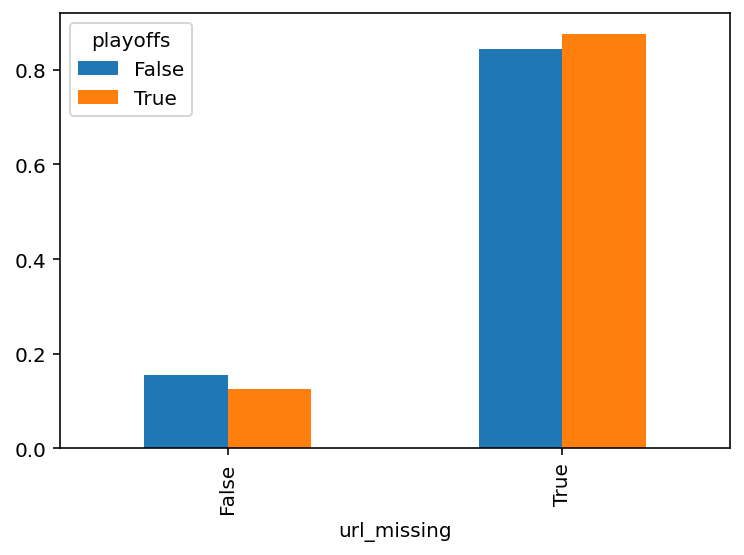

In [65]:
# calculate the proportion of missing urls in playoffs or not
miss_urls['playoffs'] = lol_2022_clean['playoffs'].astype('bool')
pivot_url_playoffs = miss_urls.pivot_table(index = 'url_missing', columns = 'playoffs', values = 'position', aggfunc='count')
pivot_url_playoffs = pivot_url_playoffs.divide(pivot_url_playoffs.sum(), axis = 1)
display(pivot_url_playoffs, pivot_url_playoffs.plot.bar())


In [66]:
# observed tvd
obs_tvd_playoffs = pivot_url_playoffs.diff(axis = 1).iloc[:, -1].abs().sum()
obs_tvd_playoffs

0.06273160253490559

In [67]:
# perform permuation and calculate the tvds from shuffling
to_shuffle = miss_urls.copy()[['url_missing', 'playoffs', 'position']]
to_shuffle
n_repetitions = 5000
tvds_playoffs = []
for i in range(n_repetitions):
    to_shuffle['shuffle_playoffs'] = np.random.permutation(to_shuffle['playoffs'].values)
    pivot_shuffle = to_shuffle.pivot_table(index = 'url_missing', columns = 'shuffle_playoffs', values = 'position', aggfunc='count')
    pivot_shuffle = pivot_shuffle.divide(pivot_shuffle.sum(), axis = 1)
    tvds_playoffs.append(pivot_shuffle.diff(axis = 1).iloc[:, -1].abs().sum())


In [68]:
to_shuffle.shape

(4000, 4)

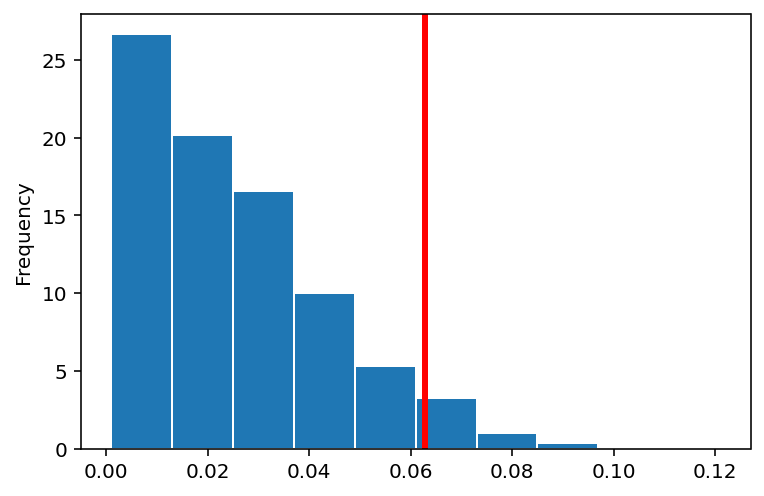

In [69]:
# graphe the distribution of tvds and plot the observed tvd together with the simulated data
pd.Series(tvds_playoffs).plot(kind='hist', density=True, ec='w', bins=10)
plt.axvline(x=obs_tvd_playoffs, color='red', linewidth=3);

In [70]:
# calculate the p-value 
(tvds_playoffs >= obs_tvd_playoffs).mean()

0.0488

### Conclusion

Since our observed p-value is larger than 0.01, we fail to reject the null at a significant level of 0.01. It is likely that whether the game is playoff or not does not affect whether the url of the game is missing. In this case, the urls are missing as MCAR (completely random from playoffs). 

Because we previously found a specfic gameid pattern with a long string of titile (e.g. "ESPORTSTMNT") and a serial number in non-missing url columns. Therefore, we will focus on if url missingness if dependent on whether this title exists in gameid. 

Q2: Is the missingness of urls dependent on gameid? 

Null hypothesis: the distribution of missing url is the same no matter whether the id contains the string "ESPORTSTMNT"

Alternative hypothesis: the distribution of missing url is different whether the id contains the string "ESPORTSTMNT"

In [36]:
miss_urls['gameid'][:3]

93418     ESPORTSTMNT04_2410791
8506      ESPORTSTMNT01_2707330
107722         9198-9198_game_2
Name: gameid, dtype: object

title_bool,False,True
url_missing,,
False,0.707524,0.005982
True,0.292476,0.994018


<AxesSubplot:xlabel='url_missing'>

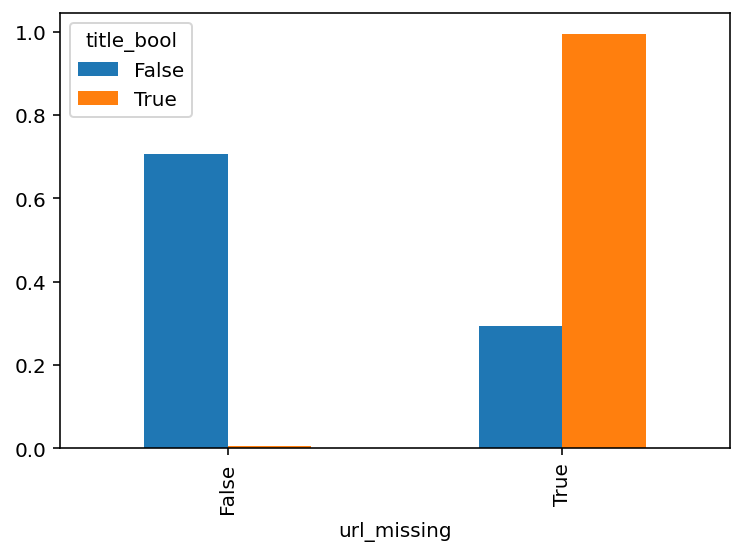

In [37]:
# calculate the proportion of missing urls in title 
miss_urls['title_bool'] = miss_urls['gameid'].str.contains("ESPORTSTMNT")
pivot_url_title = miss_urls.pivot_table(index = 'url_missing', columns = 'title_bool', values = 'position', aggfunc='count')
pivot_url_title = pivot_url_title.divide(pivot_url_title.sum(), axis = 1)
display(pivot_url_title, pivot_url_title.plot.bar())
        

In [38]:
# observed tvd
obs_tvd_title = pivot_url_title.diff(axis = 1).iloc[:, -1].abs().sum()
obs_tvd_title

1.4030838081729478

In [39]:
# perform permuation and calculate the tvds from shuffling
to_shuffle = miss_urls.copy()[['url_missing', 'title_bool', 'position']]
to_shuffle
n_repetitions = 5000
tvds_title = []
for i in range(n_repetitions):
    to_shuffle['shuffle_title'] = np.random.permutation(to_shuffle['title_bool'].values)
    pivot_shuffle = to_shuffle.pivot_table(index = 'url_missing', columns = 'shuffle_title', values = 'position', aggfunc='count')
    pivot_shuffle = pivot_shuffle.divide(pivot_shuffle.sum(), axis = 1)
    tvds_title.append(pivot_shuffle.diff(axis = 1).iloc[:, -1].abs().sum())


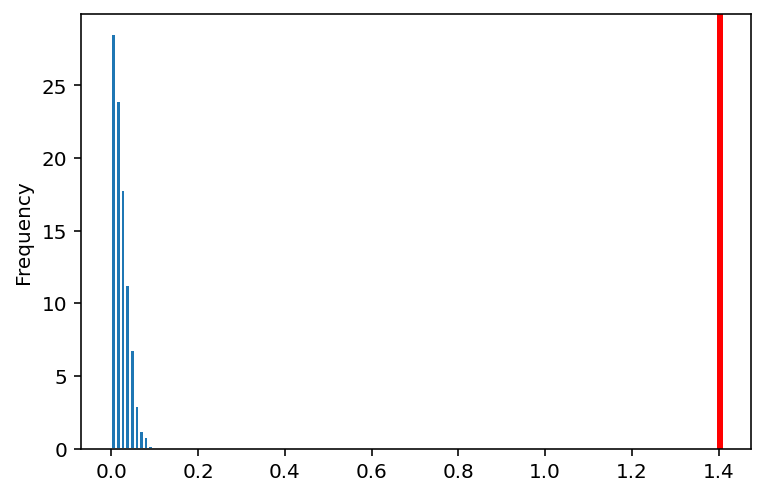

In [40]:
# graphe the distribution of tvds and plot the observed tvd together with the simulated data
pd.Series(tvds_title).plot(kind='hist', density=True, ec='w', bins=10)
plt.axvline(x=obs_tvd_title, color='red', linewidth=3);

In [41]:
# calculate the p-value 
(tvds_title >= obs_tvd_title).mean()

0.0

### Conclusion

Since our observed p-value is much smaller than 0.01, and the observed tvs is very far from the simulated tvd distribution, we are able to reject the null at a significant level of 0.01. We conclude that the missingness of the urls of a game is dependent on whether the gameid contains the string "ESPORTSTMNT". In this case, the urls are missing as MAR. 

## Hypothesis Test

### Backgroud information: 

Banning champion in League of Legent is a critical technique. Yet,we realized that there are several champions that were banned more often then others. This has led us to wonder whether using a commonly banned champion in a game
effect the result of the game. 



### Question: Are commonly banned champions more likely to win a match?

### Step 1: Finding commonly banned champions: 
- we will start by finding a list of commonly banned champions
- we have decided to set a threshold defining a commonly banned hero as having ban rate of 20%


In [42]:
# ban_df contians all banned hero form all games in this year
all_ban=lol_2022[lol_2022['position'] == 'team'][['ban1','ban2','ban3','ban4','ban5']]
ban_list=list(all_ban["ban1"])+list(all_ban["ban2"])+list(all_ban["ban3"])+list(all_ban["ban4"])+list(all_ban["ban5"])
ban_df=pd.DataFrame(ban_list).dropna()
ban_df=ban_df.rename(columns={0: "ban"})
ban_df.head(3)

,ban
0,Karma
1,Lee Sin
2,Sona


In [43]:
#ban_rate shows the calsulated ban rate of champions
num_games=len(ban_list)/10
ban_rate=pd.DataFrame(ban_df["ban"].value_counts()/num_games)
ban_rate.head(3)

,ban
Zeri,0.379499
Gwen,0.343259
LeBlanc,0.236502


- lets visualize the ban rate from the above ban_df, we will only show the first several for representation

<AxesSubplot:title={'center':"champion's ban_rate"}>

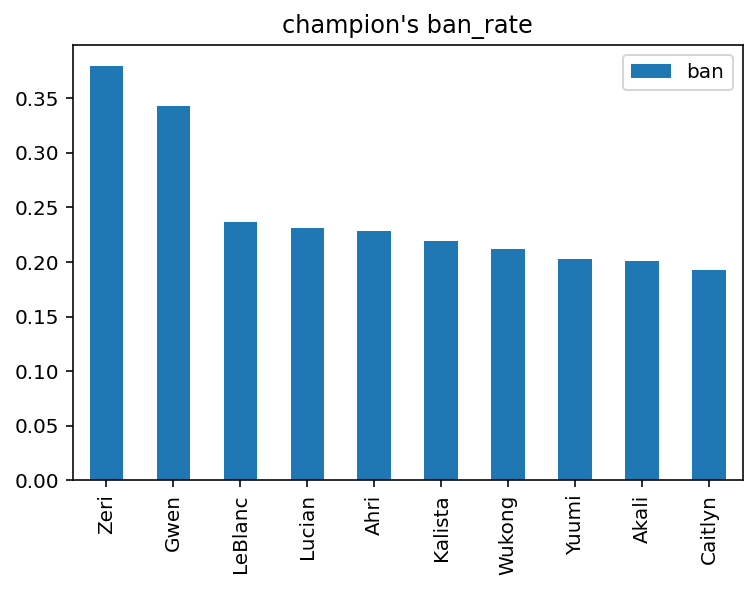

In [44]:
ban_rate[:10].plot(kind="bar",title="champion's ban_rate")

In [45]:
# show a the list of commonly banned heros using the threshold 20%
commonly_banned=list(ban_rate[ban_rate["ban"]>=0.2].index)

# >>> commonly_banned
# >>> ['Zeri','Gwen','LeBlanc','Lucian','Ahri','Kalista','Wukong','Yuumi','Akali']

- we found thatcommonly banned heros are: Zeri, Gwen, LeBlanc, Lucian, Ahri, Kalista, Wukong, Yuumi, Akali 

### Step 2 : Hypothesis Test
Now we can perform a permutation test of whether commonly banned champions more likely to win a match

### Hypothesis: 
- null hypothesis: commonly banned champion and other champions have the same lilelyness to win
- alternativel hypothesis: commonly banned champions are more likely to win a game

### significant level : 
- we have decided to choose 0.01 as our significant level.
- the data set is really large so we choose a small significant level

In [46]:
# this is the df we will be working with
all_champ=lol_2022[lol_2022["position"]!="team"][["champion","result"]]
all_champ.head(3)


,champion,result
0,Renekton,0
1,Xin Zhao,0
2,LeBlanc,0


### Test Statistic: signed difference between the winning rate
- calculating winnng rates:
    - commonly ban champ winning rate = commonly banned champ num game played and won / commonly banned num games played
    - other champ winning rate = other champ num game played and won / other champ num games played
- test statistic:
    - commonly banned champ winning rate - other champ winning rate

We chose to find the winning rate, because we need to normalize the values. 
At the same time we chose to find the signed difference becasue our alternative hypothesis is that commonly banned champion have a higher chance of winning. Therfore, it is expected that the bigger this test statistic the more we goes towards the alternative hypothesis



In [47]:
# start by adding a boolean coloumn indicating wether a campion is a commonly banned champion
all_champ["commonly_banned"]=all_champ["champion"].isin(commonly_banned)
all_champ.head(3)


,champion,result,commonly_banned
0,Renekton,0,False
1,Xin Zhao,0,False
2,LeBlanc,0,True


In [48]:
# calculate obseverd stats

def finding_ts(df):
    c_game_won=df[df["commonly_banned"]==True]["result"].sum()
    c_game=df[df["commonly_banned"]==True]["champion"].count()
    o_game_won=df[df["commonly_banned"]==False]["result"].sum()
    o_game=df[df["commonly_banned"]==False]["champion"].count()
    obs_stat=(c_game_won/c_game)-(o_game_won/o_game)
    return obs_stat

obs_stat=finding_ts(all_champ)
obs_stat

0.030586448526676913

### Permutation Test


In [49]:
# perform 1000 simulation

test_stats=[]
for i in range(1000):
    to_shuffle = all_champ.copy()
    shuff = to_shuffle["commonly_banned"]
    to_shuffle["commonly_banned"]=np.random.permutation(shuff.values)
    test_stats+=[finding_ts(to_shuffle)]

In [50]:
# first 5 vlaues of the simulated test statistic 
test_stats[:5]

[0.00014249615260386594,
 -0.0011573579937048106,
 -0.0034834127818362814,
 -0.003072932525107208,
 -0.00019957072800369513]

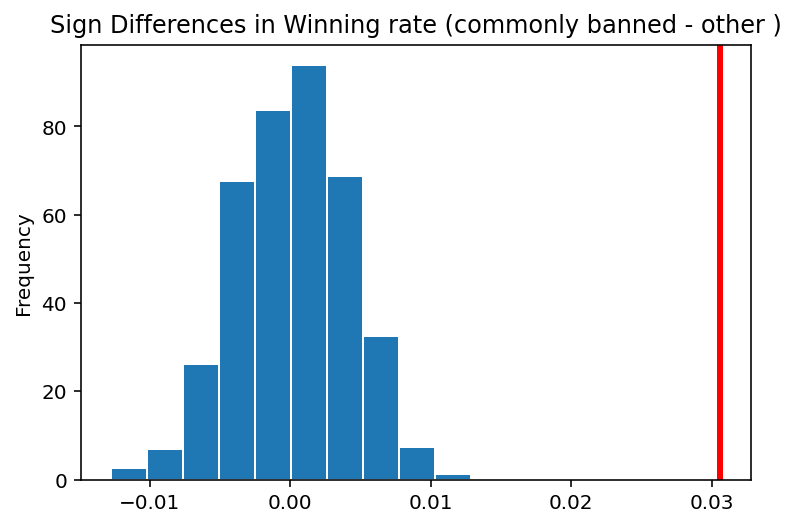

In [51]:
# now lets graph for some visualizations

title = 'Sign Differences in Winning rate (commonly banned - other )'
pd.Series(test_stats).plot(kind='hist', density=True, ec='w', bins=10, title=title)
plt.axvline(x=obs_stat, color='red', linewidth=3);

### P value:

In [52]:
(test_stats>=obs_stat).mean()

0.0

### Conclusion: 
In conclustion, we reject the null at significasnt level 0.01. our data suggest that using commonly banned champion in a game is more likely to win the game.